In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### we cannot directly take the string values in the "ocean_proximity" since its text, so it needs to be preprocessed

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Now we will remove the null values

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Now all the data rows are properly filled without any "Null" Value

### Now we will split the data into training and testing data, since we will train the model on one set and test it on another

In [10]:
from sklearn.model_selection import train_test_split

### What train_test_split Does
It is used to *split a dataset* into two or more parts, typically for *training and testing* a machine learning model.

The most common split is *training data* (used to train the model) and *testing data* (used to evaluate the model’s performance on unseen data).

In [11]:
X = data.drop('median_house_value', axis=1)
Y = data["median_house_value"]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

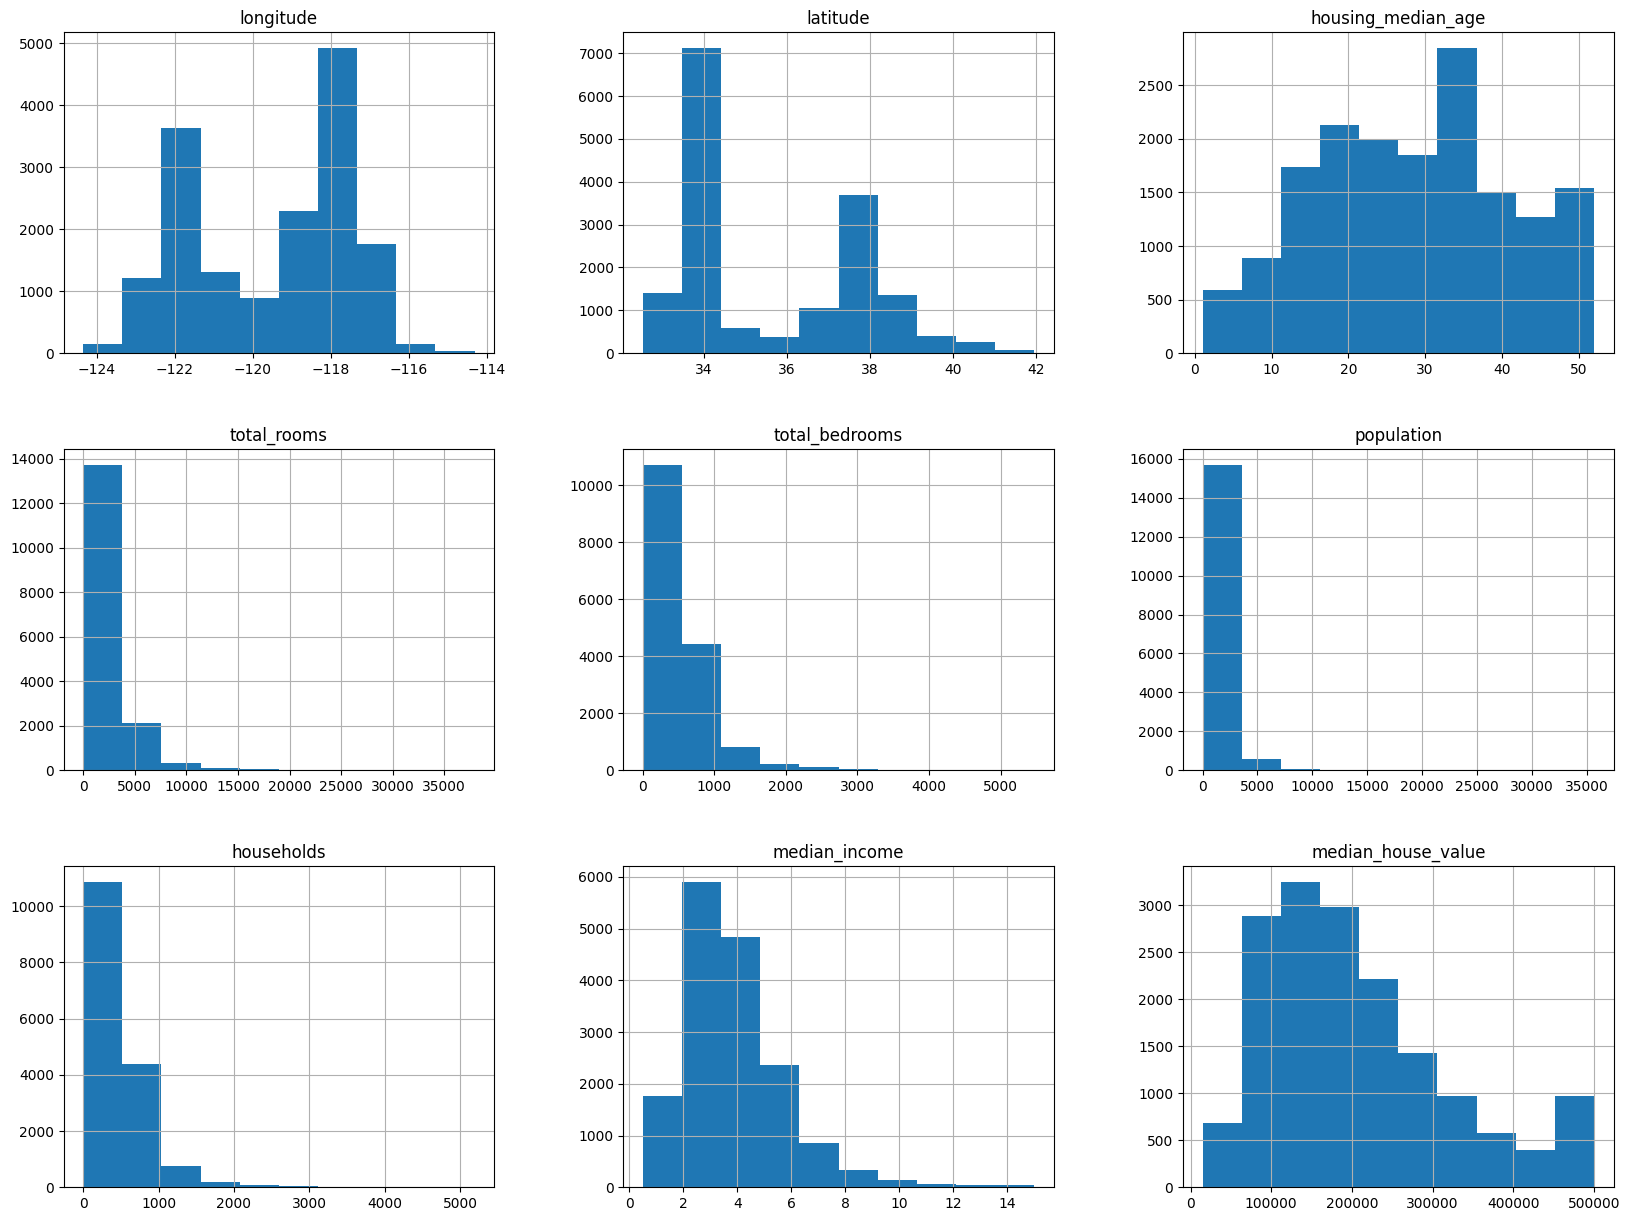

In [21]:
train_data = X_train.join(Y_train)
train_data.hist(figsize=(20, 15))

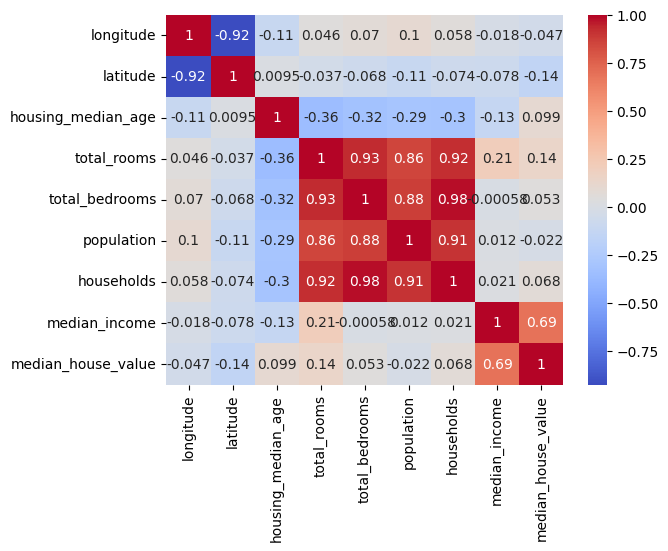

In [24]:
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [46]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

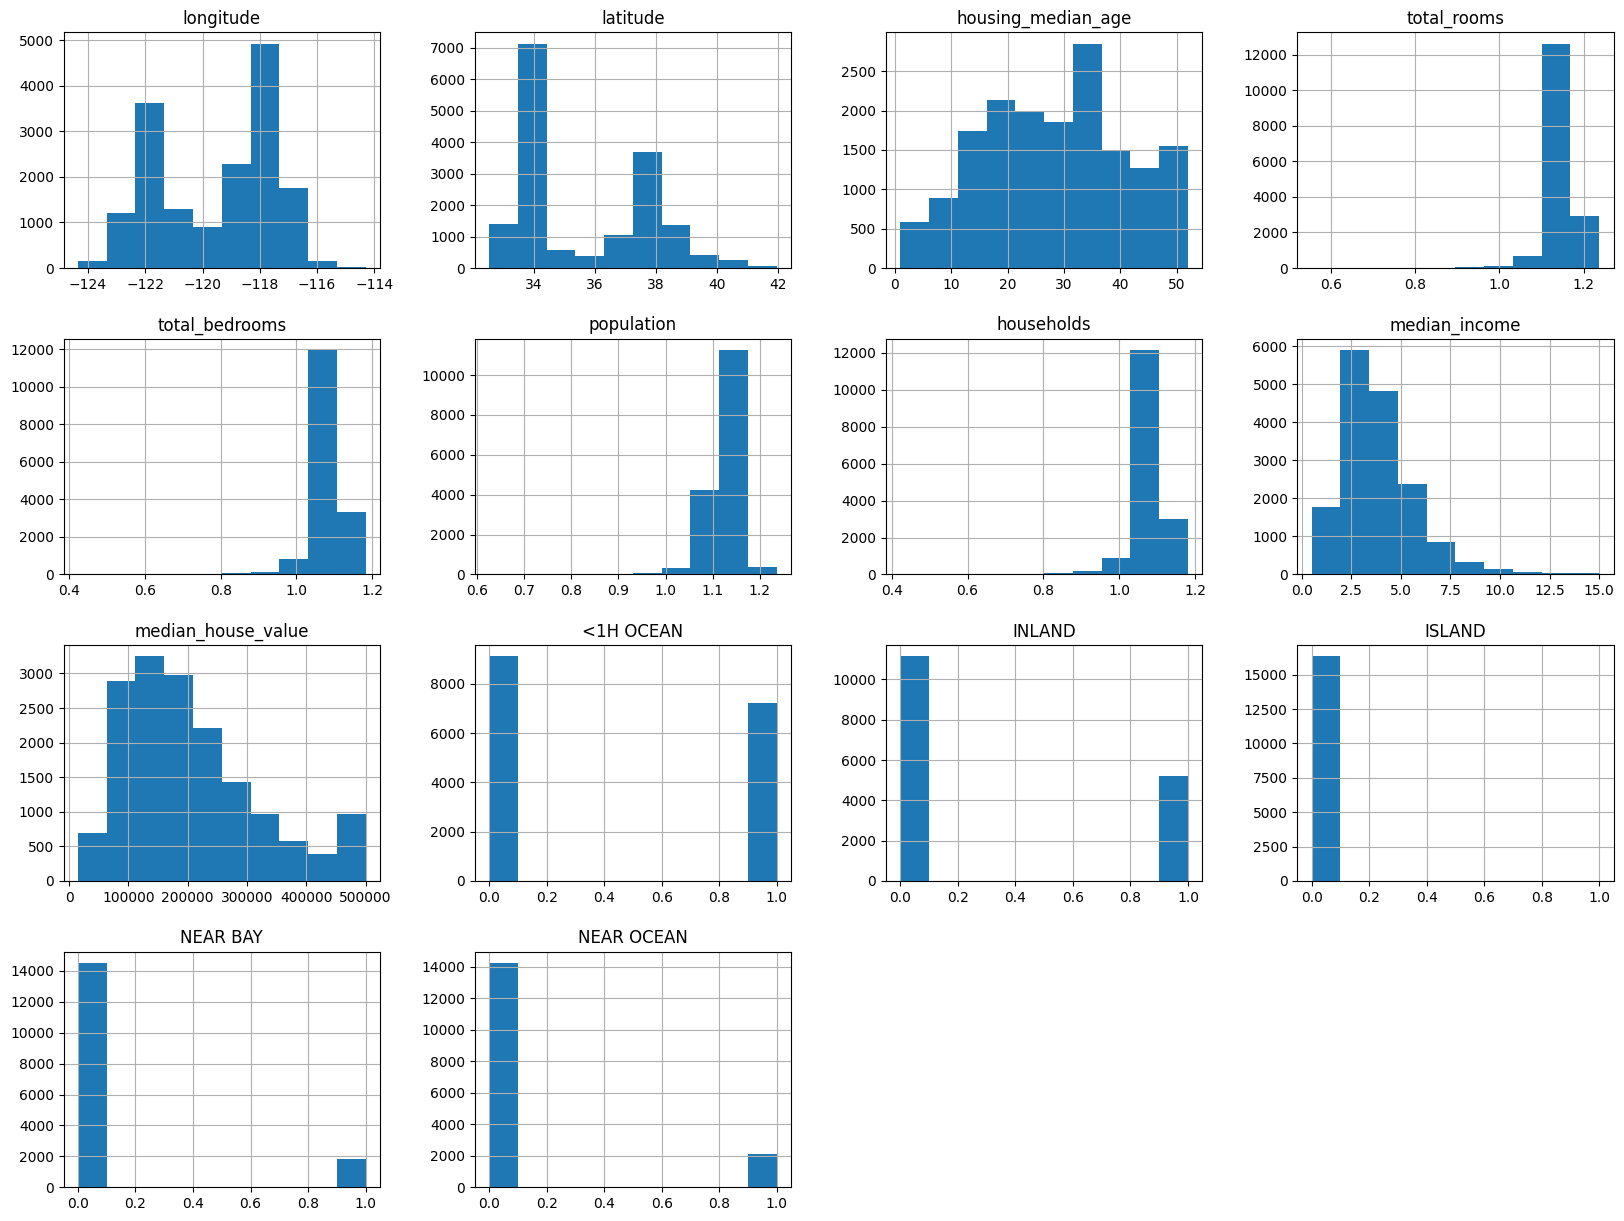

In [47]:
train_data.hist(figsize=(20, 15))

### What we just did is, normalize the training data into gausian bell curve by taking its logarithm, previously the data was skewed

#### Now we will change the ocean proximity data to something which is scalable by the computer

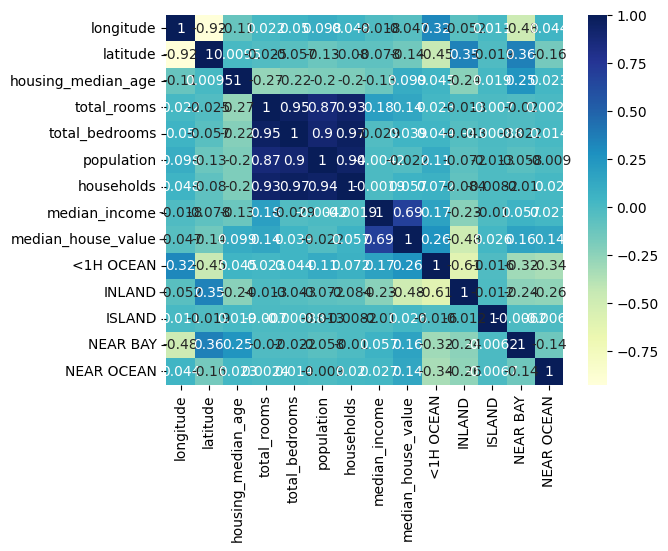

In [62]:
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

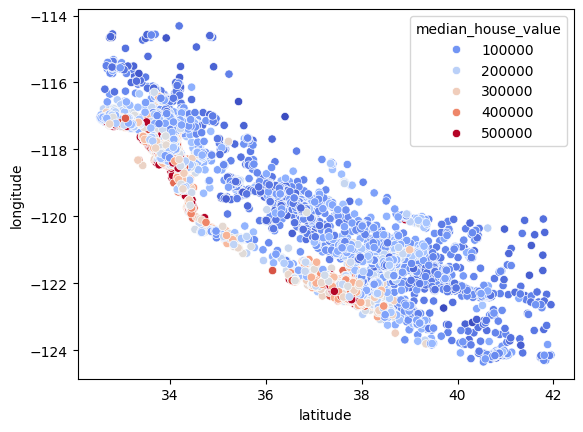

In [65]:
plt.Figure(figsize=(20, 20))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

#### Now we are adding extra features which we find interesting


In [69]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
train_data['population_household'] = train_data['population'] / train_data['households']
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,population_household
6885,-118.09,34.06,31.0,1.126564,1.063884,1.127156,1.057966,2.2083,185600.0,1,0,0,0,0,0.944361,1.064839,1.065399
13190,-117.71,34.07,31.0,1.144920,1.077629,1.127975,1.074557,3.8875,129200.0,0,1,0,0,0,0.941226,1.065480,1.049712
14705,-117.06,32.81,17.0,1.171784,1.095100,1.141813,1.095348,6.7927,234700.0,1,0,0,0,0,0.934557,1.069783,1.042420
6758,-118.12,34.11,48.0,1.150221,1.068927,1.110844,1.068927,5.2131,359600.0,1,0,0,0,0,0.929323,1.076052,1.039214
8381,-118.36,33.96,21.0,1.144139,1.095595,1.131161,1.095677,2.7284,146900.0,1,0,0,0,0,0.957571,1.044231,1.032386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,-118.49,34.22,30.0,1.143169,1.068127,1.116593,1.063705,5.0325,238200.0,1,0,0,0,0,0.934356,1.074705,1.049721
11418,-117.96,33.70,23.0,1.157795,1.085236,1.125020,1.080964,4.7250,289600.0,1,0,0,0,0,0.937330,1.071077,1.040756
4250,-118.35,34.10,26.0,1.172105,1.123017,1.142388,1.118233,3.3580,364500.0,1,0,0,0,0,0.958120,1.048175,1.021601
5825,-118.30,34.19,14.0,1.168902,1.117240,1.146581,1.114332,3.5083,280900.0,1,0,0,0,0,0.955803,1.048970,1.028940


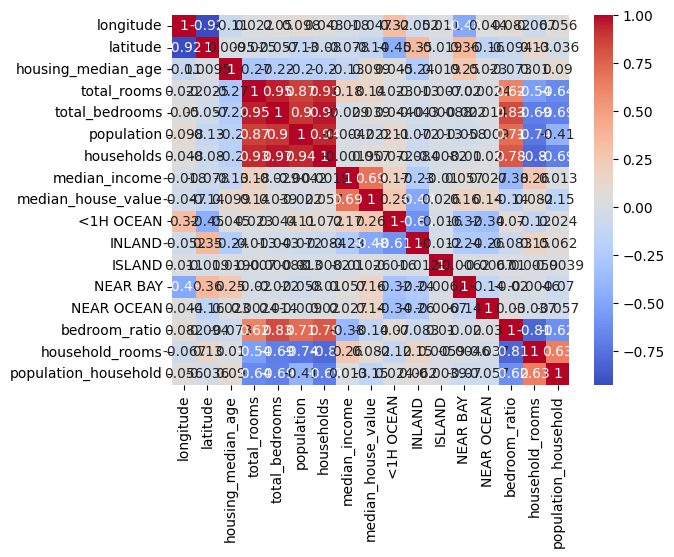

In [71]:
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression

X_test = train_data.drop('median_house_value', axis=1)
Y_test = train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [94]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) 
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
 
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
test_data['population_household'] = test_data['population'] / test_data['households']

X_test = test_data.drop('median_house_value', axis=1)
Y_test = test_data['median_house_value']



In [95]:
reg.score(X_test, Y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND
